In [1]:
from neural_network import NNTrain
import nn_functions as nn
from nn_functions import relative_err_without_points as rel_err
from plots import plot_fun, plot_iteration, animate_p
from itertools import product

In [62]:
a = NNTrain(nx=60, bx=700, hidden_nodes=50, alpha=1e-6, bc=1000, batch_size=32)

In [ ]:
a.train(100)

In [ ]:
bc_multiplier = 2
thresh = 1e-7

for i in range(10000):
    if a.alpha < 1e-10  or a.bc > 200000:
        break
    if np.abs(np.mean([s-t for s, t in zip(a.cost_rate[-101:], a.cost_rate[-100:])])) < thresh:
        a.bc *= bc_multiplier
        a.alpha /= bc_multiplier
    a.train(100)

In [63]:
# nx=100
# test = np.array(list(product(np.linspace(0, 1, nx), np.linspace(0, 1, nx))))
# a.points = np.array([(x,y) for x,y in test if (x not in [0,1] and y not in [0,1])])

a.alpha = 1e-8
a.bc = 1e5

In [76]:
print('alpha:', a.alpha)
print('BC:', a.bc)
print('number of iterations', len(a.cost_rate))
print('relative error:', rel_err(a.p00, a.p01, a.p1, a.p2, nx=1000))

alpha: 1e-08
BC: 100000.0
number of iterations 747949
relative error: 0.015226899869326682


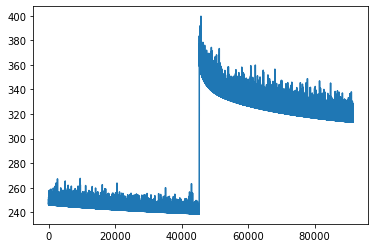

In [71]:
plot_iteration(a.cost_rate, min_it=500000)

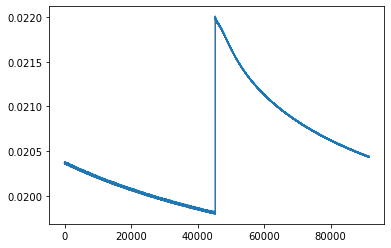

In [72]:
plot_iteration(a.rel_err, min_it=500000)

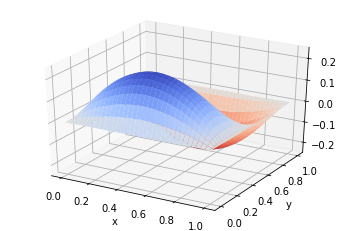

In [73]:
plot_fun(nn.N, p00=a.p00, p01=a.p01, p1=a.p1, p2=a.p2)

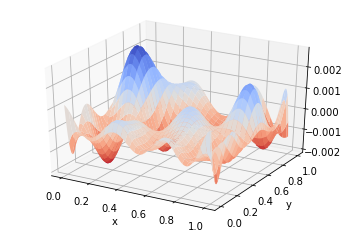

In [74]:
plot_fun(lambda x,y,p00,p01,p1,p2: nn.psi_a(x,y) - nn.N(x,y,p00,p01,p1,p2), p00=a.p00, p01=a.p01, p1=a.p1, p2=a.p2)

### Load parameters

In [64]:
name_str = '20200826-1957_eq1_7_v9'

par = np.load('output/' + name_str + '_nn_params.npz', allow_pickle=True)['arr_0']
a.p00 = par[0][0]
a.p01 = par[0][1]
a.p1 = par[1]
a.p2 = par[2]
a.cost_rate = list(np.load('output/' + name_str + '_cost_rate.npz')['arr_0'])
a.rel_err = list(np.load('output/' + name_str + '_rel_err.npz')['arr_0'])
a.m_t = np.load('output/' + name_str + '_momentum.npz')['arr_0']

In [30]:
a.save_result('eq1_7_v9')